# Exploratory Data Analysis and Data Visualization for Price recommendation for Online Marketplace

At a large scale, determining product pricing becomes increasingly challenging due to the vast number of products sold online. Different product categories, such as clothing and electronics, exhibit unique pricing trends. Clothing prices are heavily influenced by seasonal trends and brand names, while electronics prices fluctuate based on product specifications.

Mercari, Japan's largest community-powered shopping app, is well aware of this complexity. They aim to provide pricing suggestions to sellers on their marketplace. However, this task is difficult as Mercari's sellers have the freedom to list almost anything or any combination of items, making it a complex and diverse marketplace.


GOAL OF THIS PROJECT: 
Explore the data and create visualization to assist determining reasonable pricing for marketplace sellers of Mercari.

## Table of contents
1. Setting up 
2. Checking and transforming the data
3. Data Exploration and Visualization

# 1. Setting up 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,skew
from scipy import stats
import datetime as dt
%matplotlib inline

In [2]:
train = pd.read_csv('/Users/asamitakeuchi/mercari/train.tsv', sep='\t')
test = pd.read_csv('/Users/asamitakeuchi/mercari/test.tsv', sep='\t')

# 2. Checking and transforming the data

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [4]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [6]:
#check null data
def check_if_null(df):
    null = df.isnull().sum()
    null_percent = (df.isnull().sum()/df.count()*100).round(2)
    null_values = pd.concat([null, null_percent], axis = 1)
    null_values.columns = ['Null Values', '%Null']
    return null_values

check_if_null(train)

,Null Values,%Null
train_id,0,0.00
name,0,0.00
item_condition_id,0,0.00
category_name,6327,0.43
brand_name,632682,74.45
price,0,0.00
shipping,0,0.00
item_description,4,0.00


The brand_name column has a high % of null values. 
I'm going to fill them with "NoBrand" values.

In [31]:
#Fill Null values of brand_name with "Nobrand"
train["brand_name"] = train["brand_name"].fillna("NoBrand")
train["brand_name"].head()

0    NoBrand
1      Razer
2     Target
3    NoBrand
4    NoBrand
Name: brand_name, dtype: object

Next, I'm going throught the 'category_name' column

In [7]:
#Top 20 values of'category_name' column
train['category_name'].value_counts()[:20]

Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Blouse                                    20284
Women/Tops & Blouses/Tank, Cami                                20284
Women/Dresses/Above Knee, Mini                                 20082
Women/Jewelry/Necklaces                                        19758
Women/Athletic Apparel/Shorts                                  19528
Beauty/Makeup/Makeup Palettes                                  19103
Women/Shoes/Boots                 

The "category name" column is separated into three categories by using "/".
Let's separate them into three columns.

In [8]:
#make a function to separate the columns
train[["cat_1","cat_2","cat_3"]] = train.category_name.str.split("/", n=2, expand=True)
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,cat_1,cat_2,cat_3
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


Check each category by goint through "cat_1","cat_2","cat_3"
(Data Visualization will be done in the following section)

In [9]:
#"cat_1" values souted by frequency
train.cat_1.value_counts()

Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Name: cat_1, dtype: int64

In [10]:
#Top 20 "cat_2" values souted by frequency
train.cat_2.value_counts()[:20]

Athletic Apparel             134383
Makeup                       124624
Tops & Blouses               106960
Shoes                        100452
Jewelry                       61763
Toys                          58158
Cell Phones & Accessories     53290
Women's Handbags              45862
Dresses                       45758
Women's Accessories           42350
Jeans                         36130
Video Games & Consoles        35971
Sweaters                      35752
Underwear                     33784
Skin Care                     29838
Home Décor                    25188
Fragrance                     24294
Kitchen & Dining              21954
Tops                          20591
Other                         20017
Name: cat_2, dtype: int64

In [11]:
#Checking all the values of "cat_2"
train.cat_2.unique()

array(['Tops', 'Computers & Tablets', 'Tops & Blouses', 'Home Décor',
       'Jewelry', 'Other', 'Swimwear', 'Apparel', 'Collectibles',
       'Makeup', 'Fragrance', 'Dresses', 'Office supplies', 'Shoes',
       'Gear', 'Athletic Apparel', 'Cell Phones & Accessories', 'Jeans',
       'Underwear', 'Skin Care', 'Toys', "Women's Handbags",
       'Video Games & Consoles', 'Coats & Jackets', 'Pants', 'Girls (4+)',
       'Antique', 'Kitchen & Dining', 'Sweaters', 'Boys 0-24 Mos',
       'Girls 0-24 Mos', 'Maternity', 'Bedding', 'Exercise',
       'Trading Cards', 'Boys (4+)', 'Storage & Organization', 'Fan Shop',
       'Girls 2T-5T', "Men's Accessories", 'Boys 2T-5T',
       "Women's Accessories", 'Daily & Travel items', nan, 'Skirts',
       'Hair Care', 'Pet Supplies', 'Book', 'Tools & Accessories',
       'Team Sports', 'Home Appliances', 'Accessories', 'Bags and Purses',
       'Sweats & Hoodies', 'Shorts', 'TV, Audio & Surveillance',
       'Outdoors', 'Bath & Body', 'Car Seats & Acc

In [12]:
#Top 20 "cat_3" values souted by frequency
train.cat_3.value_counts()[:20]

Pants, Tights, Leggings    60177
Other                      50224
Face                       50171
T-Shirts                   46380
Shoes                      32168
Games                      30906
Lips                       30871
Athletic                   27059
Eyes                       26038
Cases, Covers & Skins      24676
Shorts                     21815
Bras                       21274
Blouse                     20288
Tank, Cami                 20284
Boots                      20270
Above Knee, Mini           20082
Necklaces                  19758
Makeup Palettes            19103
Women                      18975
Shirts & Tops              16876
Name: cat_3, dtype: int64

In [94]:
train.groupby('cat_2').size()

cat_2
Accessories                8213
Antique                    6093
Apparel                    2918
Art                         656
Artwork                    1264
                          ...  
Video Games & Consoles    35971
Weddings                    611
Women's Accessories       42350
Women's Handbags          45862
Woodworking                 121
Length: 113, dtype: int64

In [95]:
train.groupby('cat_3').size()

cat_3
100 Years or Older             140
50 To 75 Years                  92
75 To 100 Years                 42
A-Line                         756
Above Knee, Mini             20082
                             ...  
Yarn                           171
Yoga & Pilates                 517
Zipper                           1
iPad/Tablet/eBook Access      1073
iPad/Tablet/eBook Readers     1986
Length: 871, dtype: int64

In [13]:
#There are 4809 different brands
train.groupby('brand_name').size()

brand_name
!iT Jeans              1
% Pure                61
10.Deep                3
191 Unlimited          1
1byone                 1
                    ... 
tokidoki             310
totes ISOTONER        28
triangl swimwear       5
vineyard vines      1712
wallis                 1
Length: 4809, dtype: int64

'brand_name' and other columns will be explored further later

In [16]:
#Exporting the new dataset into the csv file
train.to_csv("train2.csv"
            , header=True
            , index=False
            , chunksize=1500000
            , encoding="utf-8")

# 3. Data Exploration and Visualization

In [13]:
#Checking the prices by the rank of frequency
train.groupby('price').size().sort_values(ascending=False)

price
10.0      99416
12.0      78986
14.0      76655
16.0      66413
9.0       63643
          ...  
727.0         1
744.0         1
745.0         1
749.0         1
2009.0        1
Length: 828, dtype: int64

### Exploring the distribution etc. of price

In [22]:
#Exploring the "price" data
train.groupby("price").size()

price
0.0         874
3.0       18703
4.0       16139
5.0       31502
5.5          33
          ...  
1999.0        1
2000.0        6
2004.0        1
2006.0        1
2009.0        1
Length: 828, dtype: int64

The price range of the listed products in Mercari is between 0.0 and 2009.0 dollars

<Axes: xlabel='price', ylabel='Count'>

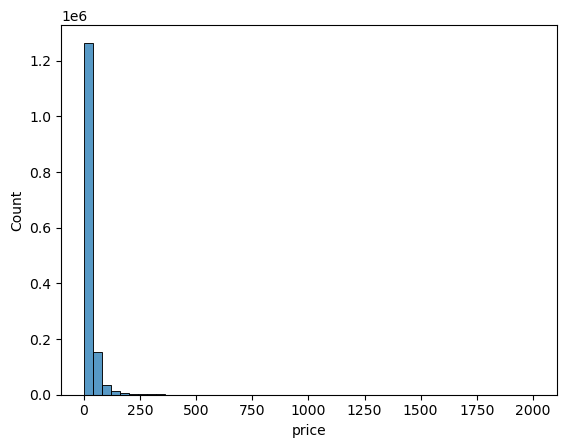

In [18]:
#Price distribution
sns.histplot(train["price"], bins=50)

In [28]:
#Top price values
train.groupby("price").size().sort_values(ascending=False)[:30]

price
10.0    99416
12.0    78986
14.0    76655
16.0    66413
9.0     63643
8.0     61564
15.0    58082
20.0    56323
7.0     52268
18.0    41243
24.0    40797
11.0    39786
19.0    37729
13.0    36800
26.0    33531
25.0    32450
6.0     32260
5.0     31502
21.0    28996
22.0    28012
30.0    25386
dtype: int64

The distribution of prices is very skewed and majority of the prices sit between 0.0 and 50 dollars. Therefore, I'm going to apply a log transformation on the data to visualize the distribution more accurately.

/Users/asamitakeuchi/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='price', ylabel='Count'>

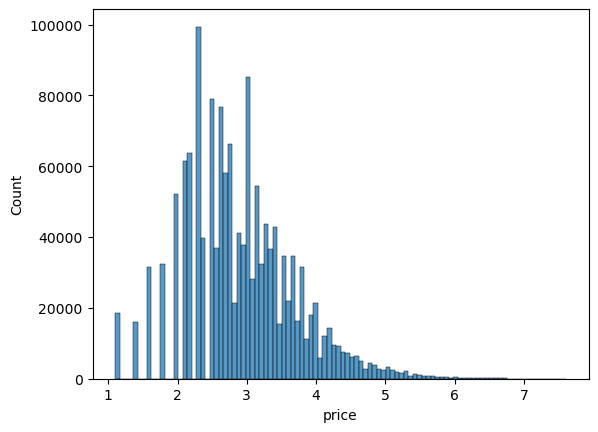

In [21]:
#The distribution of price is skewed
#So we are performing log transformation to visualize the distribution more effectively

log_price = np.log(train["price"])
sns.histplot(log_price, bins=100)

Next, I'm going to visualize the distribution of prices by contrasting whether the seller or buyer pay the shipping fee.

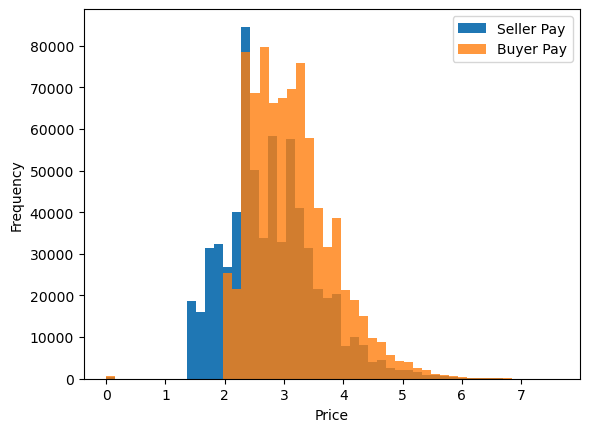

In [22]:
#distribution of price by shipping methods
#1=shipping fee paid by sellers & 0=by buyers

seller_pay = train.loc[train["shipping"] == 1, "price"]
buyer_pay = train.loc[train["shipping"] == 0, "price"]

plt.hist(np.log(seller_pay+1), bins=50, alpha=1, label="Seller Pay")
plt.hist(np.log(buyer_pay+1), bins=50, alpha= 0.8, label="Buyer Pay")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

The product tend to have higher price when buyers pay the shipment fees.

### Exploring the item_condition_id of the data
According to the description of the official source of the dataset in Kaggle, there is no detail about what the values of "item_condition_id" mean. The conditions are assigned to the values from 1 to 5.
Let's check the distribution of each item conditions by the prices.

<Axes: xlabel='item_condition_id', ylabel='price'>

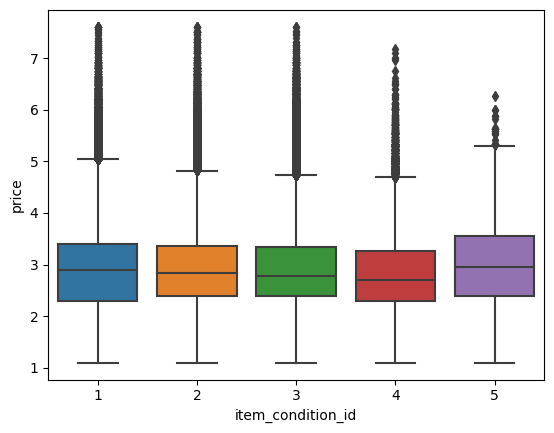

In [23]:
#Distribution of price by item_condition_id
sns.boxplot(train, x=train["item_condition_id"], y=log_price)

The distribution seems to be fairly even.

In [29]:
#checking the average, min, max, and median prices as well as frequency of each condition.
train.groupby('item_condition_id').price.agg(["mean","min","max","median","count"]).sort_values(by="mean", ascending=False)

,mean,min,max,median,count
item_condition_id,,,,,
5,31.703859,0.0,522.0,19.0,2384
2,27.563225,0.0,2004.0,17.0,375479
3,26.540711,0.0,2000.0,16.0,432161
1,26.486967,0.0,2009.0,18.0,640549
4,24.349212,0.0,1309.0,15.0,31962


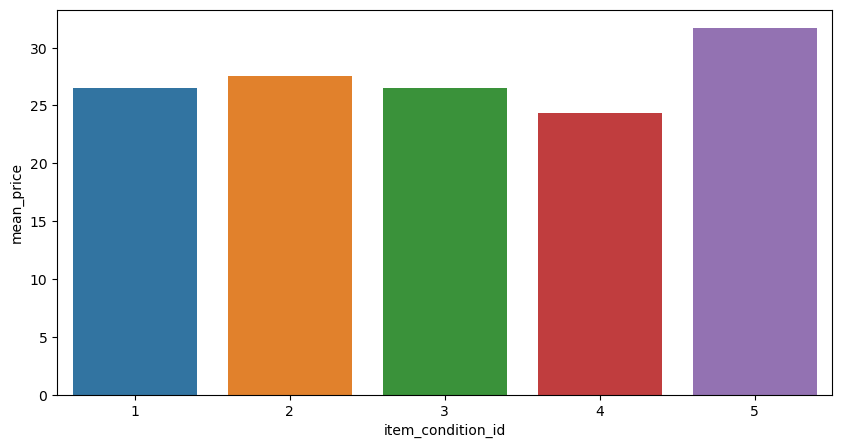

In [41]:
#Visualizing the mean prices of each item_condition_id
conditions = train.groupby('item_condition_id').price.mean().reset_index(name='mean_price').sort_values(by="mean_price", ascending=False)

fig, ax = plt.subplots(figsize=(10,5))
_=sns.barplot(data=conditions, x="item_condition_id", y="mean_price")

Although the criteria of the assignment of condition id here is missing, it seems that distribution of the data is fair and there is little difference between the condition.

### Exploration & Visualizations by brand names
There are 4809 brands listed here including NoBrand.

In [44]:
#checking Top 20 frequently listed brands
train.groupby("brand_name").price.agg(["count","mean","min","max","median"]).sort_values(by="count", ascending=False)[:20]

,count,mean,min,max,median
brand_name,,,,,
NoBrand,632682,21.133453,0.0,2000.0,14.0
PINK,54088,26.341314,0.0,798.0,20.0
Nike,54043,30.760265,0.0,459.0,22.0
Victoria's Secret,48036,23.214287,0.0,1400.0,19.0
LuLaRoe,31024,33.667967,0.0,350.0,29.0
Apple,17322,73.268618,0.0,1909.0,22.0
FOREVER 21,15186,12.929935,0.0,180.0,12.0
Nintendo,15007,34.672619,0.0,600.0,20.0
Lululemon,14558,47.096717,0.0,711.0,39.0


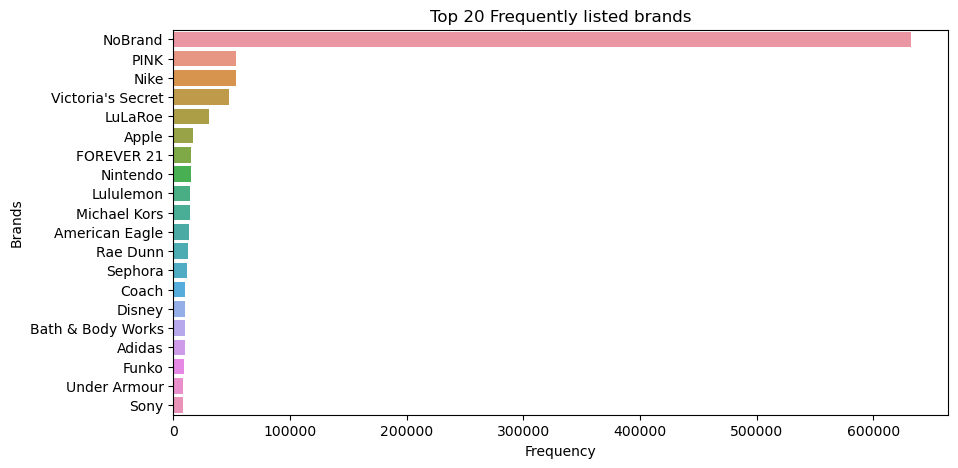

In [43]:
#Visualization
top20_brands = train.groupby("brand_name").size().reset_index(name="frequency").sort_values("frequency", ascending=False).reset_index()[:20]
fig, ax = plt.subplots(figsize=(10,5))
_=sns.barplot(x="frequency", y="brand_name", data=top20_brands)
_ = ax.set(title="Top 20 Frequently listed brands", xlabel="Frequency", ylabel="Brands")

In [64]:
#Calculate the % of NoBrands columns
percent_nobrand = 100*(train["brand_name"] == "NoBrand").sum()/len(train["brand_name"])
print(percent_nobrand,'%')

42.67568725190299 %


As clearly seen in the chart, NoBrands occupies the significant amount of the listed products with 42.7% exposure. 
However, when seeing the mean/min/max/median prices of each brands, there are still varieties. Lets sort the brands by mean prices:

In [26]:
#Mean, min, max, and media prices by top 20 brands (sorted by mean prices)
train.groupby("brand_name").price.agg(["mean","min","max","median","count"]).sort_values(by="mean", ascending=False)[:20]

,mean,min,max,median,count
brand_name,,,,,
Demdaco,429.000000,10.0,848.0,429.0,2
Proenza Schouler,413.250000,16.0,1006.0,315.5,4
Auto Meter,344.000000,344.0,344.0,344.0,1
Oris,300.000000,300.0,300.0,300.0,1
MCM Worldwide,289.173913,11.0,1359.0,129.0,69
Longines,254.000000,254.0,254.0,254.0,1
Vitamix,253.111111,16.0,640.0,205.0,9
Blendtec,251.800000,134.0,415.0,250.0,5
David Yurman,248.611570,7.0,2004.0,220.0,242


Interestingly, the top 20 highest mean prices are pretty different from the top 10 listed brands

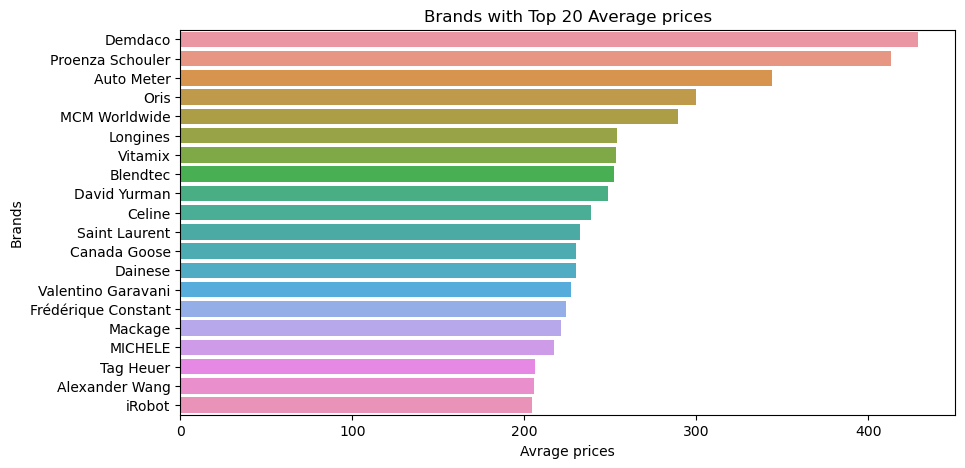

In [77]:
top20_price_br = train.groupby("brand_name").price.mean().reset_index(name="mean_price").sort_values(by="mean_price", ascending=False)[:20]
fig, ax = plt.subplots(figsize=(10, 5))
_ = sns.barplot(x="mean_price", y="brand_name", data=top20_price_br)
_ = ax.set(title="Brands with Top 20 Average prices", xlabel="Avrage prices", ylabel="Brands")

Also, lets see the brands with highest prices:

In [71]:
#Brands with Top20 highest prices
train.groupby("brand_name").price.max().sort_values(ascending=False)[:20]

brand_name
Chanel               2009.0
David Yurman         2004.0
NoBrand              2000.0
Mary Kay             2000.0
Apple                1909.0
Louis Vuitton        1815.0
Celine               1806.0
Michael Kors         1770.0
Saint Laurent        1700.0
Urban Decay          1515.0
Victoria's Secret    1400.0
Microsoft            1400.0
MCM Worldwide        1359.0
Stamped              1354.0
Prada                1350.0
Goyard               1350.0
Gucci                1325.0
Oakley               1309.0
Bose                 1250.0
Dell                 1215.0
Name: price, dtype: float64

As expected, brands with higher retail prices such as luxury brands or consumer electronis brandsalso tend have higher listing prices here.

### Exploring&Visualizing the listings by different categories

There are three separated categories, "cat_1","cat_2", and "cat_3" in the data.
Let's explore each category from "cat_1".
"cat_1" only has 10 categories:

In [78]:
#size, min/max/mean/median prices of category 1
train.groupby("cat_1").price.agg(["size","min","max","mean","median"]).sort_values(by="size", ascending=False)

,size,min,max,mean,median
cat_1,,,,,
Women,664385,0.0,2009.0,28.885496,19.0
Beauty,207828,0.0,2000.0,19.671536,15.0
Kids,171689,0.0,809.0,20.642315,14.0
Electronics,122690,0.0,1909.0,35.173922,15.0
Men,93680,0.0,1309.0,34.708614,21.0
Home,67871,0.0,848.0,24.536599,18.0
Vintage & Collectibles,46530,0.0,1709.0,27.339426,16.0
Other,45351,0.0,1400.0,20.809817,14.0
Handmade,30842,0.0,1750.0,18.156572,12.0


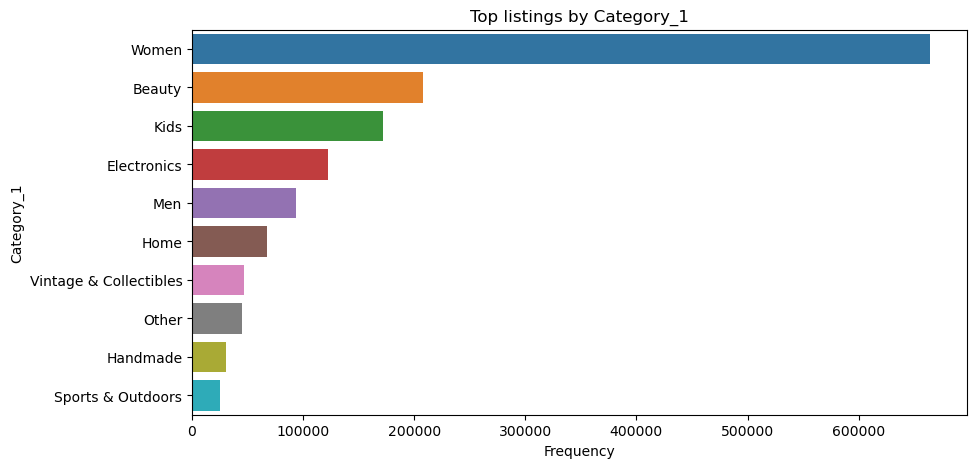

In [79]:
#Visualization of ranks by numbers of listing by category 1
cat_1_rank = train.groupby("cat_1").price.count().reset_index(name="frequency").sort_values(by="frequency", ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
_ = sns.barplot(data=cat_1_rank, x="frequency", y="cat_1")
_ = ax.set(title="Top listings by Category_1", xlabel="Frequency", ylabel="Category_1")

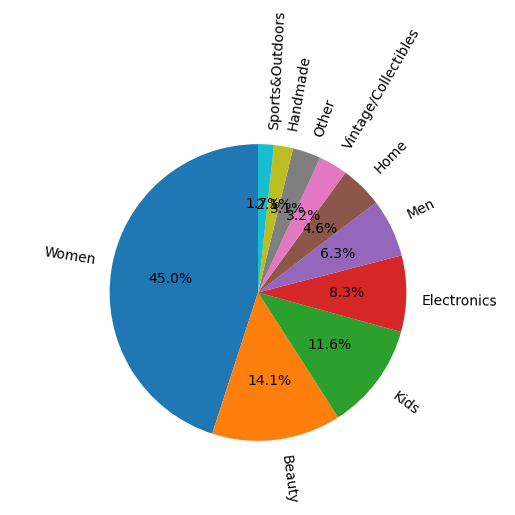

In [90]:
#Creating a Pie chart
cat_1_n = [664385, 207828, 171689, 122690, 93680, 67871, 46530, 45351, 30842, 25342]
labels=["Women","Beauty","Kids","Electronics","Men","Home","Vintage/Collectibles","Other","Handmade","Sports&Outdoors"]
fig, ax = plt.subplots()
ax.pie(cat_1_n, labels=labels, autopct='%1.1f%%',
        rotatelabels=True, shadow=False, startangle=90)
fig.autofmt_xdate(rotation=45)
ax.axis('equal')  
plt.show()

Within the category 1, "Women" products occupies the largest portions in terms of the number of listings by 45.0%. It is followed by "Beauty" (14.1%) and "Kids" (11.6%) categories. 
Next, let's see the average prices by category 1.

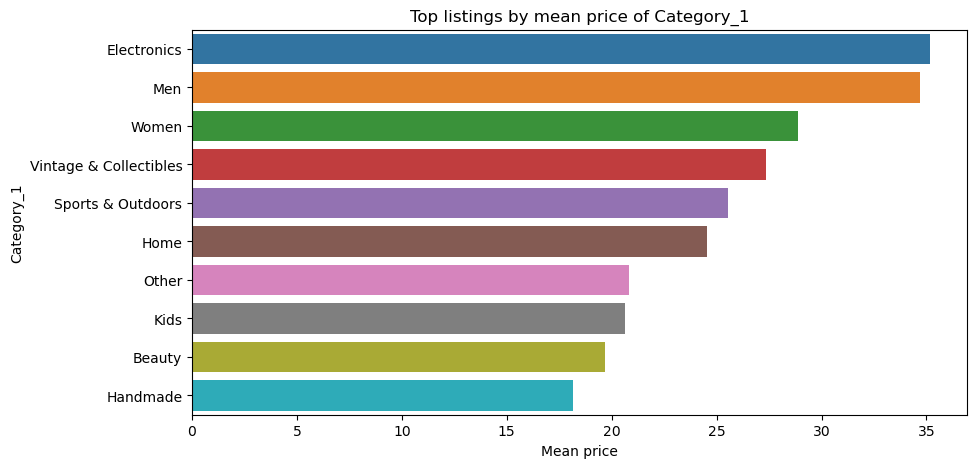

In [35]:
#Visualizing the ranking by average prices of category 1.
cat_1_mean = train.groupby("cat_1").price.mean().reset_index(name="mean_price").sort_values(by="mean_price", ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
_ = sns.barplot(data=cat_1_mean, x="mean_price", y="cat_1")
_ = ax.set(title="Top listings by mean price of Category_1", xlabel="Mean price", ylabel="Category_1")

Compared to the rnaking by the number of listings, Electronics and Men categories have higher mean prices among the listings. Vintage & Collectibles, Sports & Outdoors, and Home categories also have fewer numebr of listings but average prices are relatively higher. In contrast, Beauty and kids categories have higher numebr of listings but their abarage risting prices tend to be lower.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Men'),
  Text(1, 0, 'Electronics'),
  Text(2, 0, 'Women'),
  Text(3, 0, 'Home'),
  Text(4, 0, 'Sports & Outdoors'),
  Text(5, 0, 'Vintage & Collectibles'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Other'),
  Text(8, 0, 'Kids'),
  Text(9, 0, 'Handmade')])

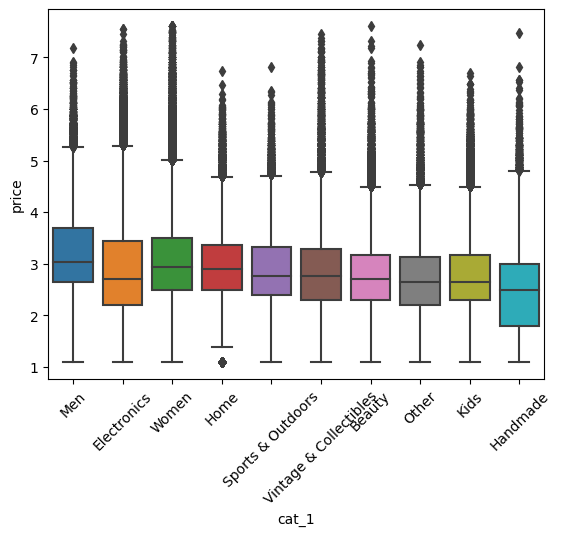

In [34]:
#Checking the distribution of prices by category 1.
sns.boxplot(train, x=train["cat_1"], y=log_price)
plt.xticks(rotation=45)

While the distributions of prices by category 1 are not significantly different between category 1, you can see that the prcie distribution of Men ten to be slightly outweighting the otehr categories while the prices for Handmade tend to be lower than others.

Next, Let's see the listings by category 2. Category 2 has 113 values.

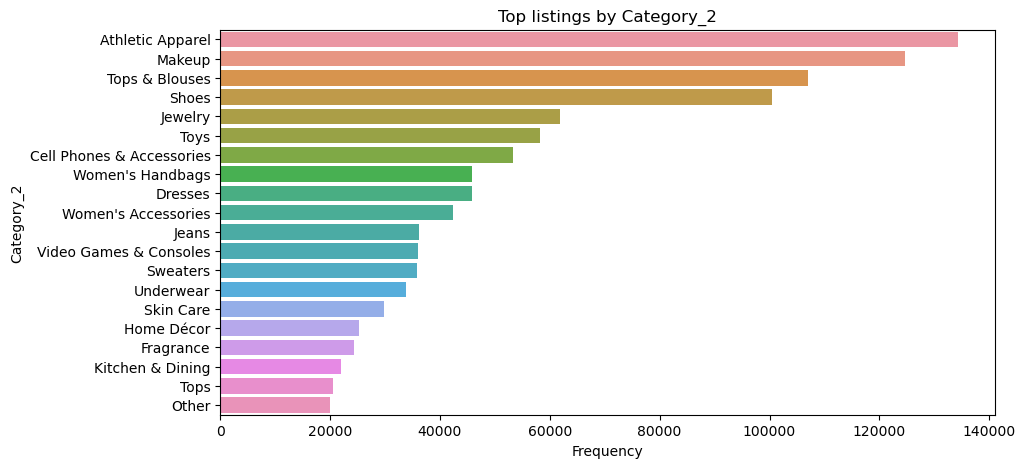

In [38]:
#Visualization of ranks by numbers of listing by category 2
cat_2_rank = train.groupby("cat_2").price.count().reset_index(name="frequency").sort_values(by="frequency", ascending=False)[:20]

fig, ax = plt.subplots(figsize=(10, 5))
_ = sns.barplot(data=cat_2_rank, x="frequency", y="cat_2")
_ = ax.set(title="Top listings by Category_2", xlabel="Frequency", ylabel="Category_2")

In [43]:
#size, min/max/mean/median prices of category 2
train.groupby('cat_2').price.agg(["size","min","max","mean","median"]).sort_values(by="size", ascending=False)

,size,min,max,mean,median
cat_2,,,,,
Athletic Apparel,134383,0.0,855.0,28.460940,22.0
Makeup,124624,0.0,2000.0,18.686176,15.0
Tops & Blouses,106960,0.0,1525.0,18.237514,14.0
Shoes,100452,0.0,950.0,41.811223,29.0
Jewelry,61763,0.0,2004.0,27.501571,14.0
...,...,...,...,...,...
Candles,64,3.0,95.0,21.734375,16.0
Ceramics and Pottery,57,3.0,66.0,20.280702,15.0
Dolls and Miniatures,49,5.0,129.0,27.469388,15.0


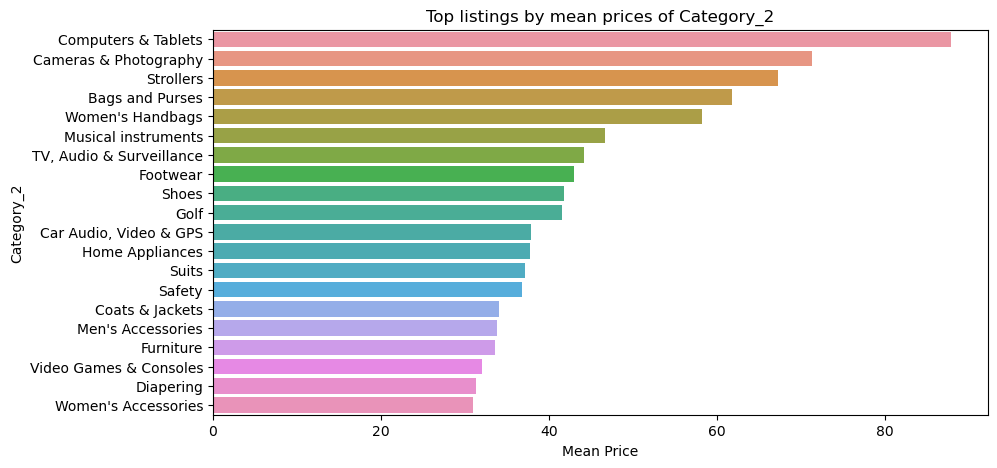

In [44]:
#Visualization of ranks by mean prices by category 2
cat_2_mean = train.groupby("cat_2").price.mean().reset_index(name="mean_price").sort_values(by="mean_price", ascending=False)[:20]

fig, ax = plt.subplots(figsize=(10, 5))
_ = sns.barplot(data=cat_2_mean, x="mean_price", y="cat_2")
_ = ax.set(title="Top listings by mean prices of Category_2", xlabel="Mean Price", ylabel="Category_2")

In terms of the numebr of listing, asletic goods, beauty products, womens' apparel products, jeweries, and accessories occupies the higher numbers. However, when you compare the mean prices of listings, electronic products, strollers,and womens handbags tend to have higher mean listing prices.
Nest, exploring the category 3. category 3 is divided by 871 categories.

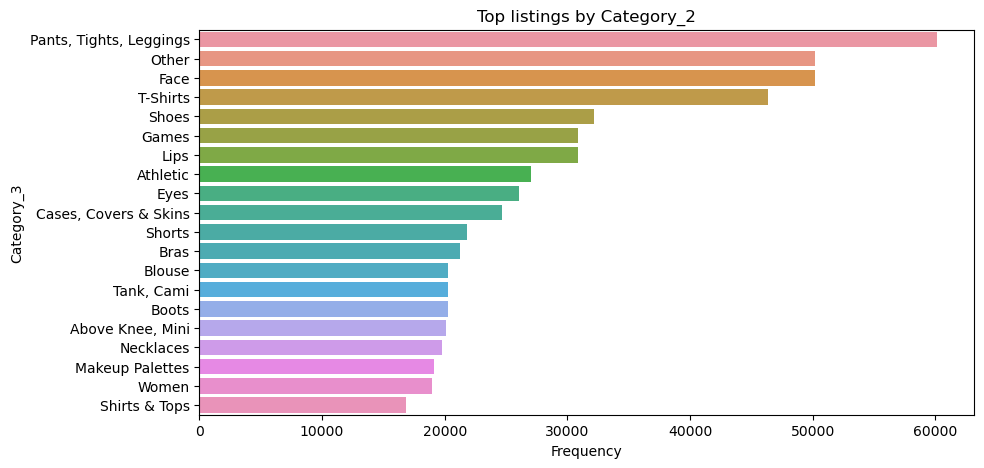

In [91]:
#Visualization of ranks by numbers of listing by category 3
cat_3_rank = train.groupby("cat_3").price.count().reset_index(name="frequency").sort_values(by="frequency", ascending=False)[:20]

fig, ax = plt.subplots(figsize=(10, 5))
_ = sns.barplot(data=cat_3_rank, x="frequency", y="cat_3")
_ = ax.set(title="Top listings by Category_2", xlabel="Frequency", ylabel="Category_3")

In [92]:
#size, min/max/mean/median prices of category 3
train.groupby('cat_3').price.agg(["size","min","max","mean","median"]).sort_values(by="size", ascending=False)

,size,min,max,mean,median
cat_3,,,,,
"Pants, Tights, Leggings",60177,0.0,600.0,34.392733,29.0
Other,50224,0.0,1400.0,23.694827,16.0
Face,50171,0.0,2000.0,19.737039,15.0
T-Shirts,46380,0.0,1525.0,19.386125,15.0
Shoes,32168,0.0,366.0,24.794656,18.0
...,...,...,...,...,...
Bathroom,1,39.0,39.0,39.000000,39.0
Four Button,1,20.0,20.0,20.000000,20.0
Aceo,1,12.0,12.0,12.000000,12.0


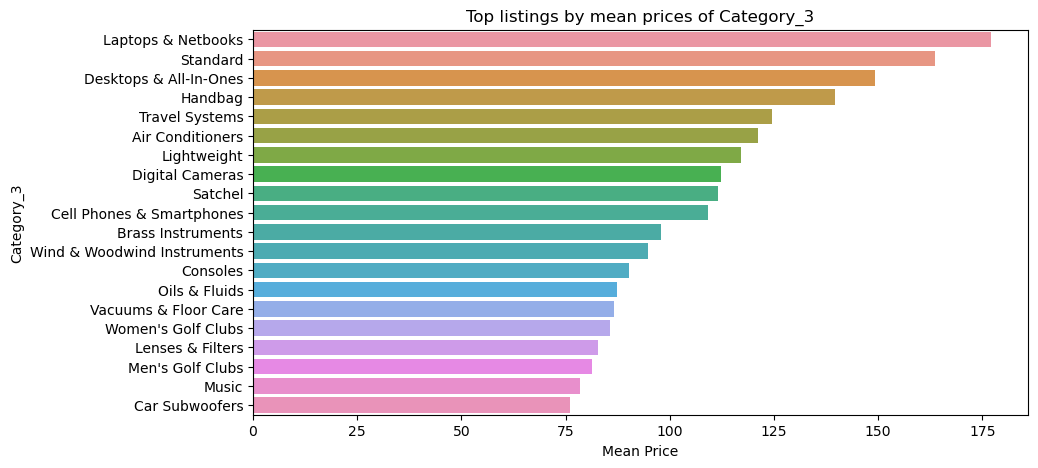

In [93]:
#Visualization of ranks by mean prices by category 2
cat_3_mean = train.groupby("cat_3").price.mean().reset_index(name="mean_price").sort_values(by="mean_price", ascending=False)[:20]

fig, ax = plt.subplots(figsize=(10, 5))
_ = sns.barplot(data=cat_3_mean, x="mean_price", y="cat_3")
_ = ax.set(title="Top listings by mean prices of Category_3", xlabel="Mean Price", ylabel="Category_3")

Seemingly, category 3 is a more in detail breakdown of the category 2.
From the chart of the top20 frequently listed product, you can see the breaksown of the athletic apparel, makeup, and tops&brouses. One notable fact here is that games 6th listed product.
From the chart for Top listings by mean prices for Category 3, you can see the breakdowns of mainly electronic goods and luxury products.
The values such as "standard" or "Lightweight" seemingly suggestes the standards or sizes of the products of category 1&2.